In [1]:
import numpy as np
import os,sys



sys.path.append('../../../RL_lib/Agents/PPO')
sys.path.append('../../../RL_lib/Utils')
sys.path.append('../..')
%load_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/AAS_18-290_3dof/Run/Run_1km


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

3-dof dynamics model
lander model apf
dvec vc 3
queue fixed
Flat Constraint


<IPython.core.display.Javascript object>


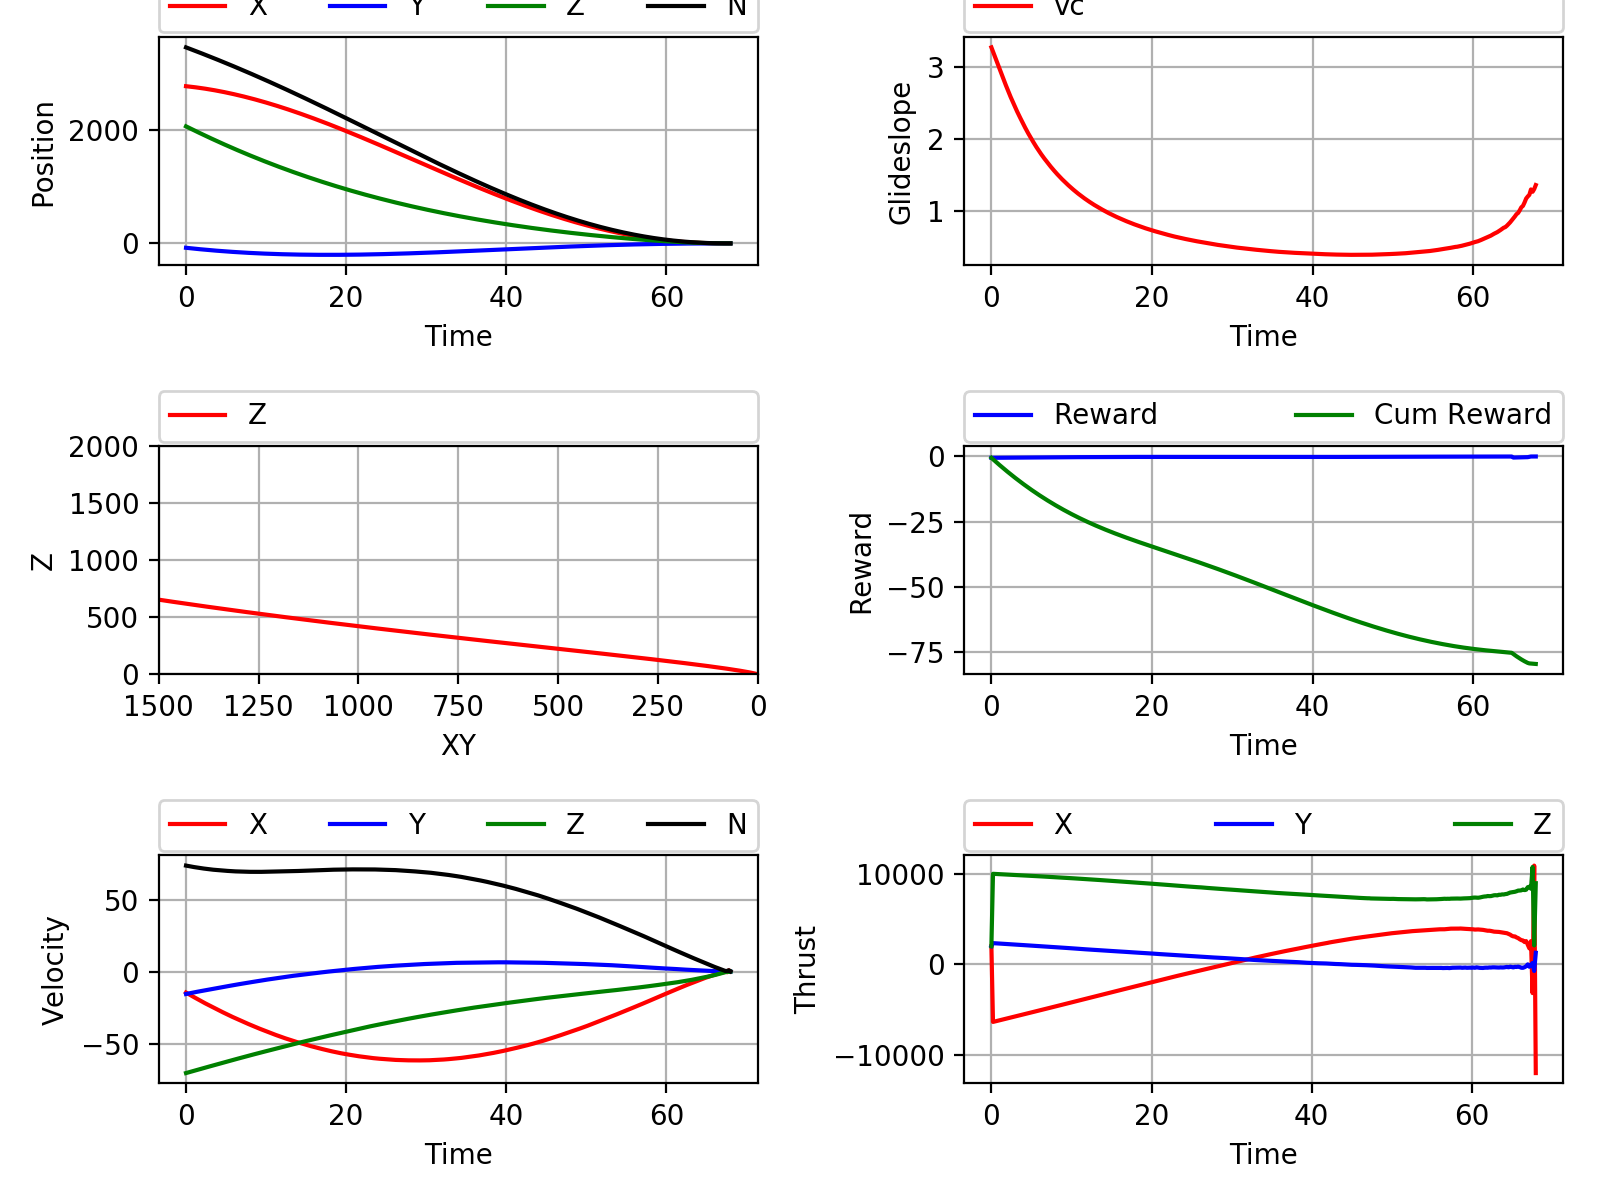

<IPython.core.display.Javascript object>


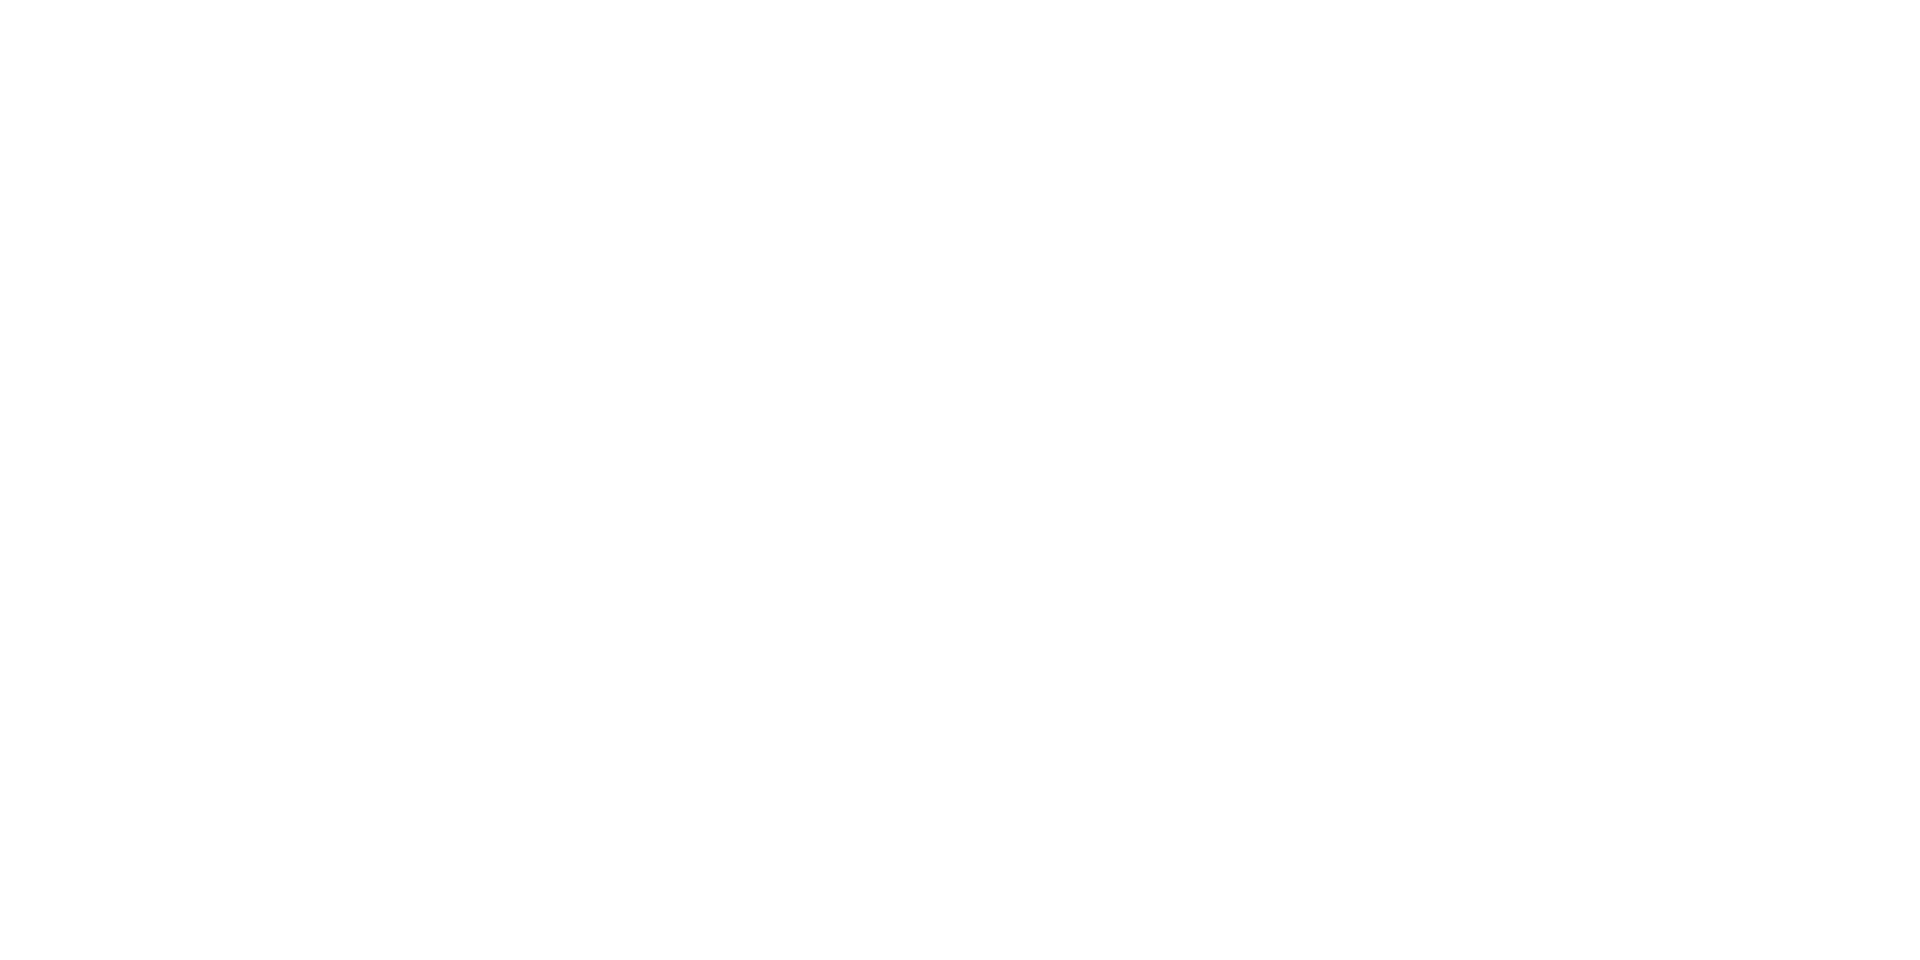

<IPython.core.display.Javascript object>


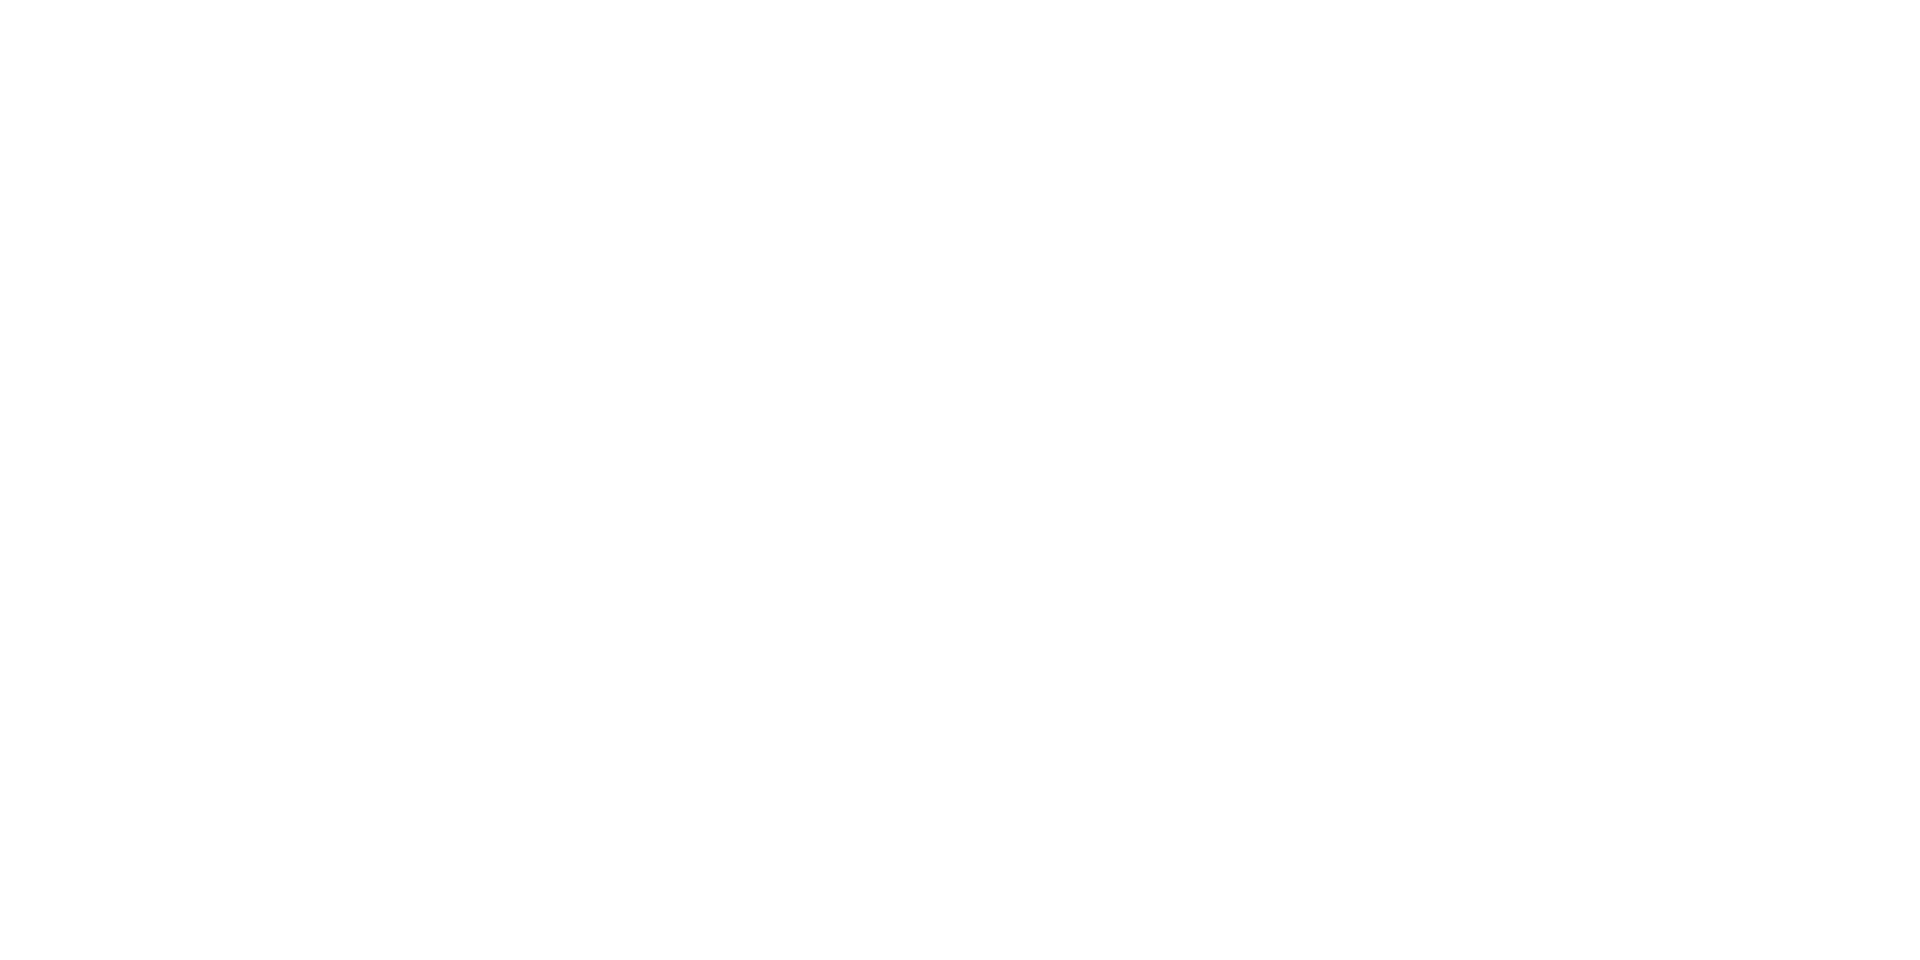

<IPython.core.display.Javascript object>


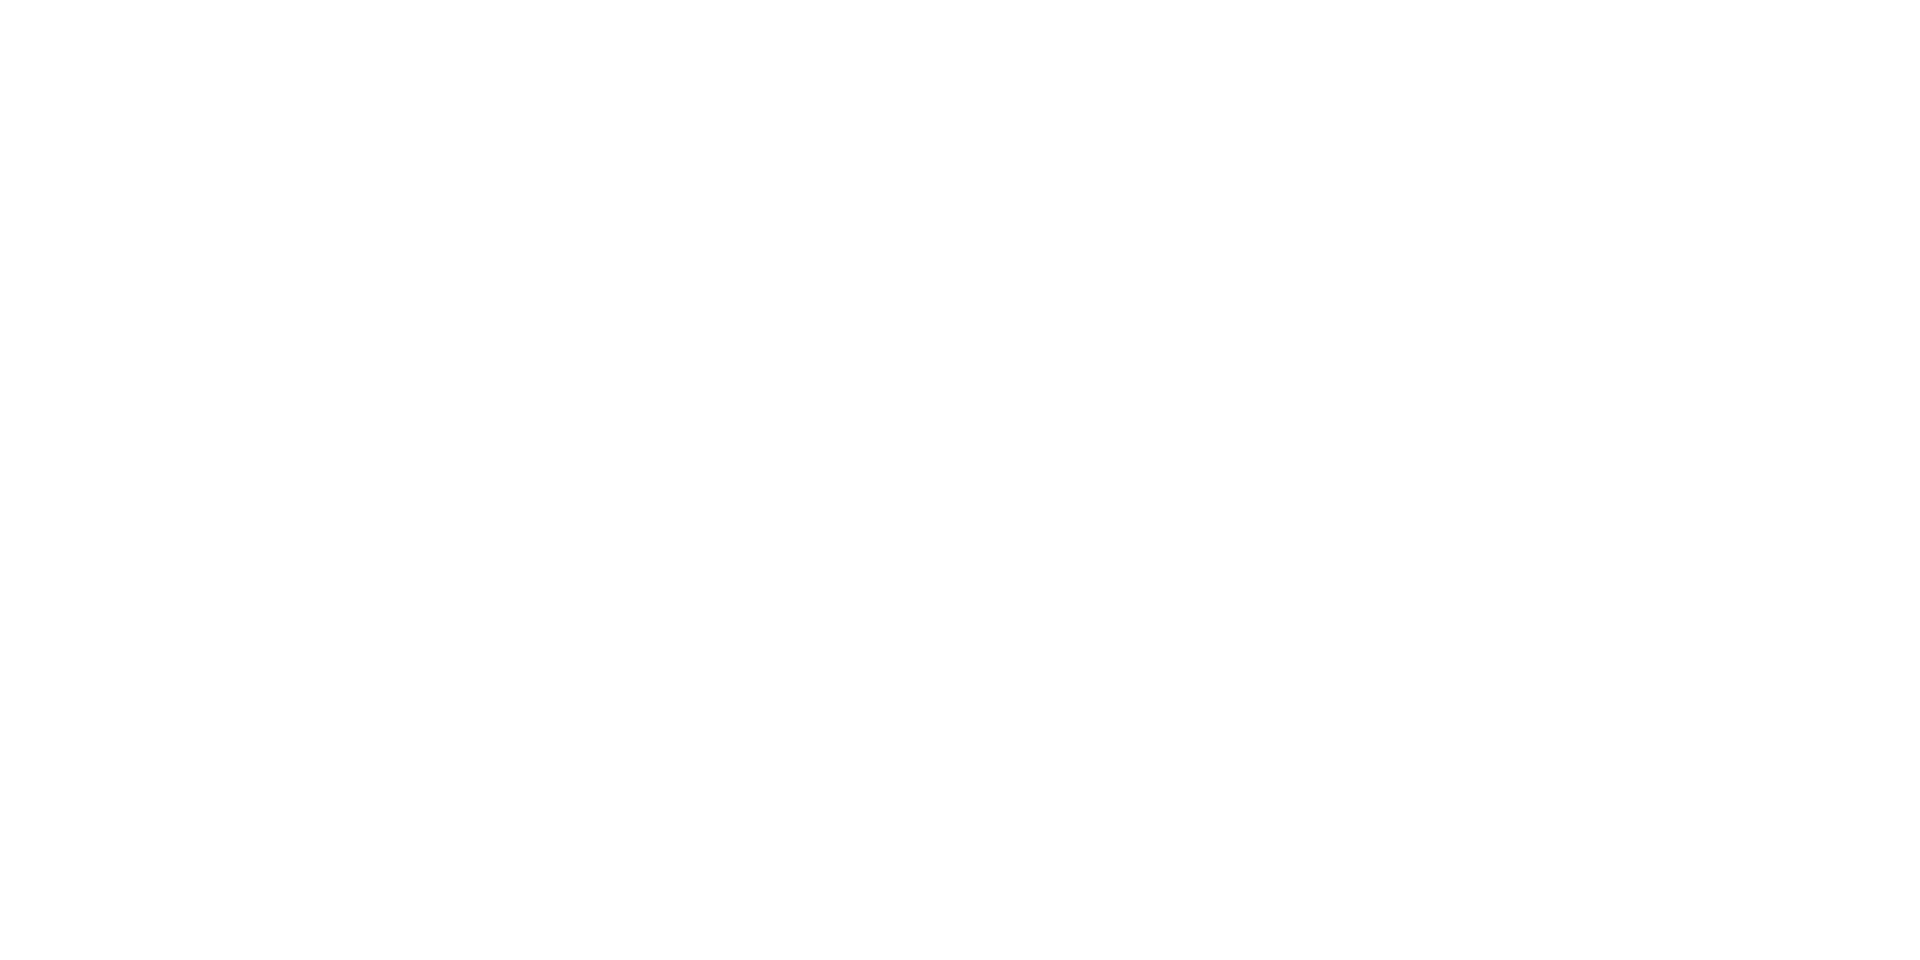

<IPython.core.display.Javascript object>


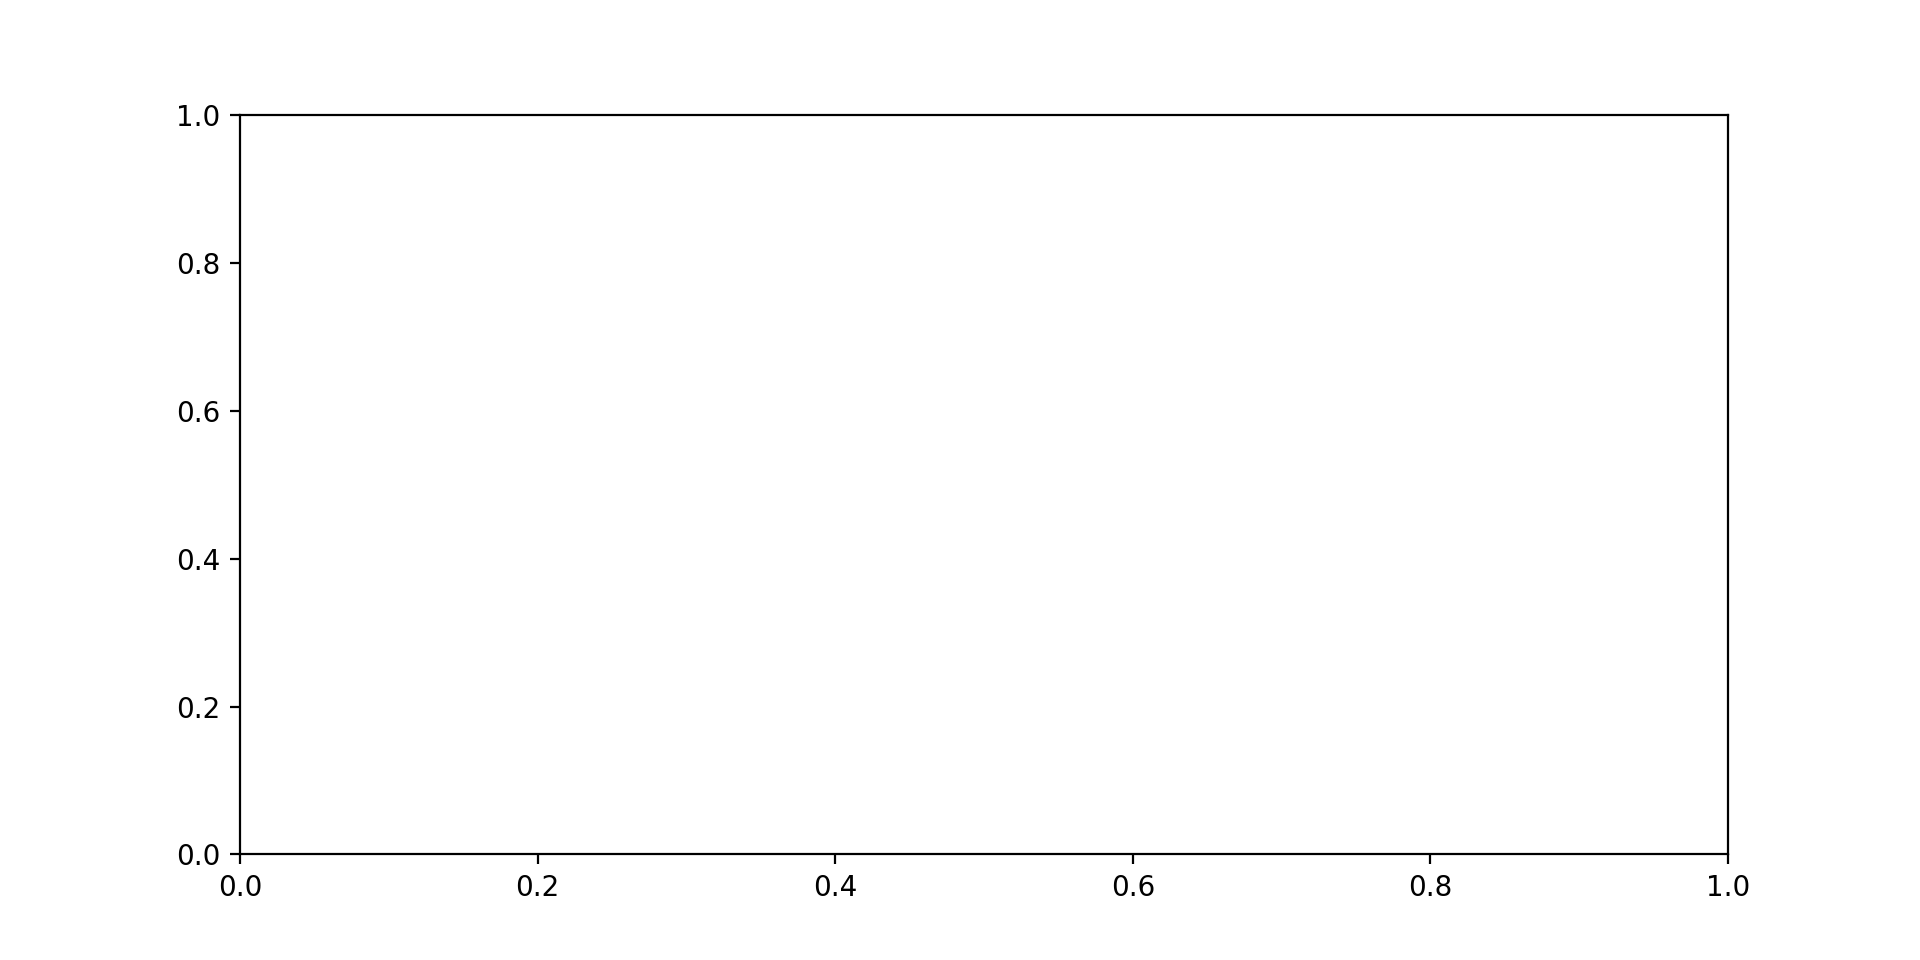

lander env new
Landing_icgen:
    downrange                   :  (0, 4000, -70, -10)
    crossrange                  :  (-1500, 1500, -30, 30)
    altitude                    :  (1900, 2100, -90, -70)
    adjust_apf_v0               :  True
340 0.05902160305627573 0.18127660030564452


In [8]:
from env import Env
from dynamics_model import Dynamics_model
from reward import Reward
from lander_model import Lander_model
from flat_constraint import Flat_constraint

from glideslope_constraint import Glideslope_constraint
from ic_gen import Landing_icgen


from drdv_agent import DRDV_agent
from utils import Mapminmax,Logger

logger = Logger()

dynamics_model = Dynamics_model(h=0.05)

lander_model = Lander_model(use_trajectory_list=True)
lander_model.get_state_agent = lander_model.get_state_agent8
#lander_model.max_thrust=55000
reward_object = Reward()
glideslope_constraint = Glideslope_constraint(gs_limit=0.0)
#shape_constraint = Parabaloid_constraint(altitude=500,debug=False)
shape_constraint = Flat_constraint()
env = Env(lander_model,dynamics_model,logger,
          reward_object=reward_object,
          glideslope_constraint=glideslope_constraint,
          shape_constraint=shape_constraint,
          tf_limit=200.0,print_every=10,
          scale_agent_action=False)


env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.05,0.05),noise_u=20,noise_sd=100,
                          downrange = (0,4000 , -70, -10), 
                           crossrange = (-1500,1500 , -30,30),  
                           altitude = (1900,2100,-90,-70))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()


In [9]:

pos,vel,traj=agent.test_batch(n=1000)

316 0.017879243038908765 0.19746523563587753
283 0.014215653152076563 0.39382902757334315
314 0.03310272384302141 0.644689488258995
259 0.02166976658595852 0.43515599892727136
202 0.0001487424725503681 0.15568047850857555
264 0.013736225021311709 0.4829435535444841
369 0.018504730292190085 0.27596520805520913
234 0.012131678747583138 0.17322771057201658
336 0.034354884498498 0.6039553262383658
264 0.007830973275308082 0.32771514836617877
280 0.010397142206287836 0.3585276802973995
298 0.0030469013972478356 0.1328333372607779
337 0.014199039928852946 0.3952222313921384
302 0.0028444585002248292 0.0931928091508072
321 0.011848423749631125 0.4032842735018441
200 0.009369539470877174 0.159101847367954
335 0.03962718853230766 0.7690751851259182
243 0.00803069858845796 0.6491801448934125
218 0.013238430483937915 0.09222567650654628
251 0.01559852938913898 0.2451621176542481
205 0.014190830098226229 0.3330760341474127
240 0.026651193726958768 0.7253839742583992
280 0.005182820854875622 0.1127

362 0.019427093488226212 0.4759529468847219
222 0.005674819427971254 0.19919745867313757
347 0.008551364677862761 0.2631102326939722
298 0.009116662982829532 0.3142678731365441
262 0.032978396871202395 0.7440459592193723
215 0.00967877039652534 0.2438275278369344
259 0.010649390281887426 0.36527000663392206
266 0.005707014949349264 0.1626492287991122
317 0.00637728456370023 0.17674611763333634
297 0.010929985228365103 0.18987652001581837
228 0.013711150140867608 0.6306839795814625
367 0.013049314416785607 0.5944368580729676
329 0.021485761028005215 0.4185308491860333
364 0.018987683534010532 0.7409437592610985
275 0.023539056359285923 0.3265921581230005
387 0.041608614819675156 0.5734415947409215
347 0.004629330437956679 0.1747346737477715
273 0.004028228429367367 0.36084690569357986
253 0.0071078722708473804 0.1505869198722633
221 0.002450328568701914 0.07839505219663614
281 0.01913687999222087 0.3655206768393182
278 0.01876318364050707 0.3216958790115603
229 0.02615139150575524 0.704

245 0.017372733889985715 0.2935909832220906
344 0.08413663201243142 0.16496046523138105
353 0.040199772267558914 0.7654133618714825
297 0.04340306032212273 0.5724341414098087
362 0.011974191656700021 0.5721044702899019
269 0.008084722244808598 0.17233977702201436
235 0.017805322273666303 0.3018537773650491
316 0.025944393835755555 0.5324348013550899
347 0.03154787947214039 0.7233962025493819
228 0.011153591102094481 0.3275478663873514
268 0.0019008510634821861 0.09520850729999226
370 0.003974278188420242 0.12909689493649112
275 0.03141675148423961 0.6709315910656192
285 0.00750892242983336 0.273827300349399
247 0.08143501527812962 1.0951635006586609
249 0.024315890962766134 0.4921432413509292
301 0.004831158173808161 0.13019393733869197
325 0.007708100442310562 0.3286310982280964
224 0.002007645535291735 0.3781835008116112
320 0.026971767859912107 0.32748315506823217
243 0.002796540403168786 0.4077787517868238
217 0.008780957396623669 0.11485562134589684
200 0.015024319633630963 0.4883

308 0.053321351143890056 1.0418124045063697
342 0.008741908898145622 0.47509705843857636
270 0.020551076149891597 0.38085078177493525
354 0.013681208562823975 0.12546191333873175
255 0.014498203687878547 0.27041708612772
275 0.009204670419484038 0.8422367817113997
404 0.01362546237947482 0.30558717877406283
296 0.02664778333170604 0.5507526840825486
328 0.042610826001839214 0.5590840136380913
245 0.0677412646993627 1.0524017328904747
224 0.017213926065861328 0.3830693079765534
230 0.012175512000209056 0.2528001795233151
301 0.009324509684890847 0.17262386128355706
325 0.06266073396742289 1.1529332503371101
286 0.006949500941579169 0.35285262643951665
307 0.06137849908362085 1.079763520804313
314 0.015059077878512687 0.3207243828059513
328 0.038227937212194724 0.5147798435090232
257 0.006112845743742443 0.112446002258575
253 0.008023712917191252 0.3523745275936801
263 0.0347357976938766 0.7702841951606711
356 0.031717624701011374 0.5841107100939414
347 0.027948507505249937 0.51524196721

328 0.02538226272090586 0.33077755490007893
274 0.00991001513829413 0.3467755857463121
220 0.022812055934504295 0.7069058573453236
217 0.0014678129828049617 0.38632767489656417
309 0.009540340799114866 0.4806232562946125
363 0.03651578289950017 0.5182334215406189
311 0.021952156514608516 0.3341593143534794
344 0.018970430110752997 0.32117076934345445
267 0.004360294684346052 0.13911135775752304
278 0.009141872707520817 0.4333299902686536
207 0.007729471847165367 0.37228054593572607
238 0.027373038370791657 0.7065351670213474
382 0.029567767868850823 0.41225646019490986
331 0.02686115598460886 0.04039073912440317
331 0.007155066763182785 0.4021164777738718
329 0.02302792907823498 0.7339129598503803
314 0.01622352802504459 0.10334878218218685
226 0.0270470262608018 0.9227238235420047
321 0.0020140130393549414 0.4811083053145553
238 0.0020926211092996837 0.4009909984627136
363 0.04101074900300937 0.7183370105503956
286 0.009807283702159178 0.5714761349624223
328 0.037045740880034386 0.459

300 0.007147834400339697 0.19601493792178395
332 0.007542769724966366 0.13144566877895317
398 0.01649679734664729 0.26215858446512763
300 0.016226525785001694 0.39879209531611826
214 0.0015145005937561918 0.13410682400228346
366 0.1162205332551487 0.27997297678810307
208 0.000847381183741589 0.20942913399976165
291 0.0259630537086341 0.5095444788127763
259 0.02830040522331885 0.5476101280779927
253 0.003894467161799422 0.4002542404130056
290 0.009345004707194945 0.40783789896518474
219 0.06705346730123736 1.0574450156830673
323 0.003930261449425936 0.16501999764883973
293 0.01688300304603497 0.3783189216674157
217 0.002435915921161553 0.36737513350472945
355 0.019174838457905317 0.7280349368529496
250 0.014518799095270957 0.36788209161819796
314 0.0047583926429763885 0.15535771140802826
290 0.0887358322548889 0.39989414127177825
369 0.04896330021473181 0.16904336401503003
248 0.03431463758600198 0.9770249001073602
297 0.014119551241866415 0.2786185725439248
321 0.06152388540638258 0.78

In [10]:
tl = lander_model.trajectory_list
print(len(tl))
pos = []
vel = []
fuel = []
gs = []
steps = []
for t in tl:
    pos.append(np.linalg.norm(t['position'][-1]))
    vel.append(np.linalg.norm(t['velocity'][-1]))
    fuel.append(np.linalg.norm(t['fuel'][-1]))
    gs.append(np.min(t['glideslope']))
    steps.append(len(t['position']))
print(np.max(pos), np.max(vel))
wc = np.argmax(pos)
print ('1: ',tl[wc]['position'][0])
print ('2: ',tl[wc]['velocity'][0])
print ('3: ',tl[wc]['position'][-1])
print ('4: ',tl[wc]['velocity'][-1])
print('mean fuel: ',np.mean(fuel))
print('std fuel: ',np.std(fuel))
print('max fuel: ',np.max(fuel))
print('min GS: ',np.min(gs))
print('mean steps: ',np.mean(steps))
print('max steps: ',np.max(steps))

1001
0.13246093250458774 1.2808167507239214
1:  [3595.00694414 1228.08212351 1936.36707626]
2:  [-63.46128283  29.6553665  -81.17716847]
3:  [ 0.13039836 -0.02325561 -0.00115912]
4:  [ 0.75967317 -0.14482412 -0.0191959 ]
mean fuel:  281.6422664335119
std fuel:  35.55756886290698
max fuel:  393.2541119779587
min GS:  0.005142208990179693
mean steps:  288.72927072927075
max steps:  407


In [11]:
new_tl = []
tl = lander_model.trajectory_list
print(len(tl))
for t in tl:
    miss = np.linalg.norm(t['position'][-1])
    if miss < 5:
        new_tl.append(t)
print(len(new_tl))
np.save('data',new_tl)

1001
998


<IPython.core.display.Javascript object>


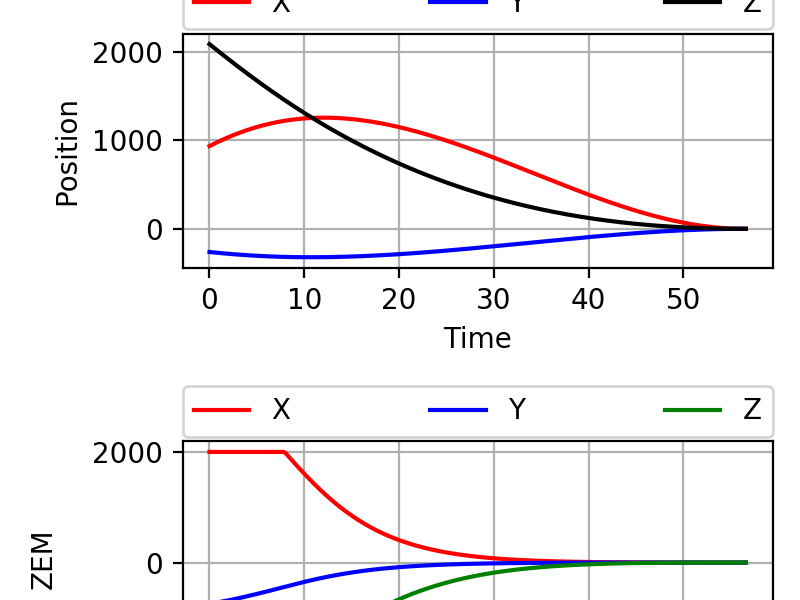

In [24]:
import env_utils as envu
npos = np.linalg.norm(pos,axis=1)
wc = np.argmax(npos)
envu.render_traj(traj[wc])

In [10]:
np.random.uniform(low=3,high=3)

3.0

Landing_icgen:
    downrange                   :  (1500, 1500, -70, -70)
    crossrange                  :  (-500, -500, -30, -30)
    altitude                    :  (2100, 2100, -90, -90)


<IPython.core.display.Javascript object>


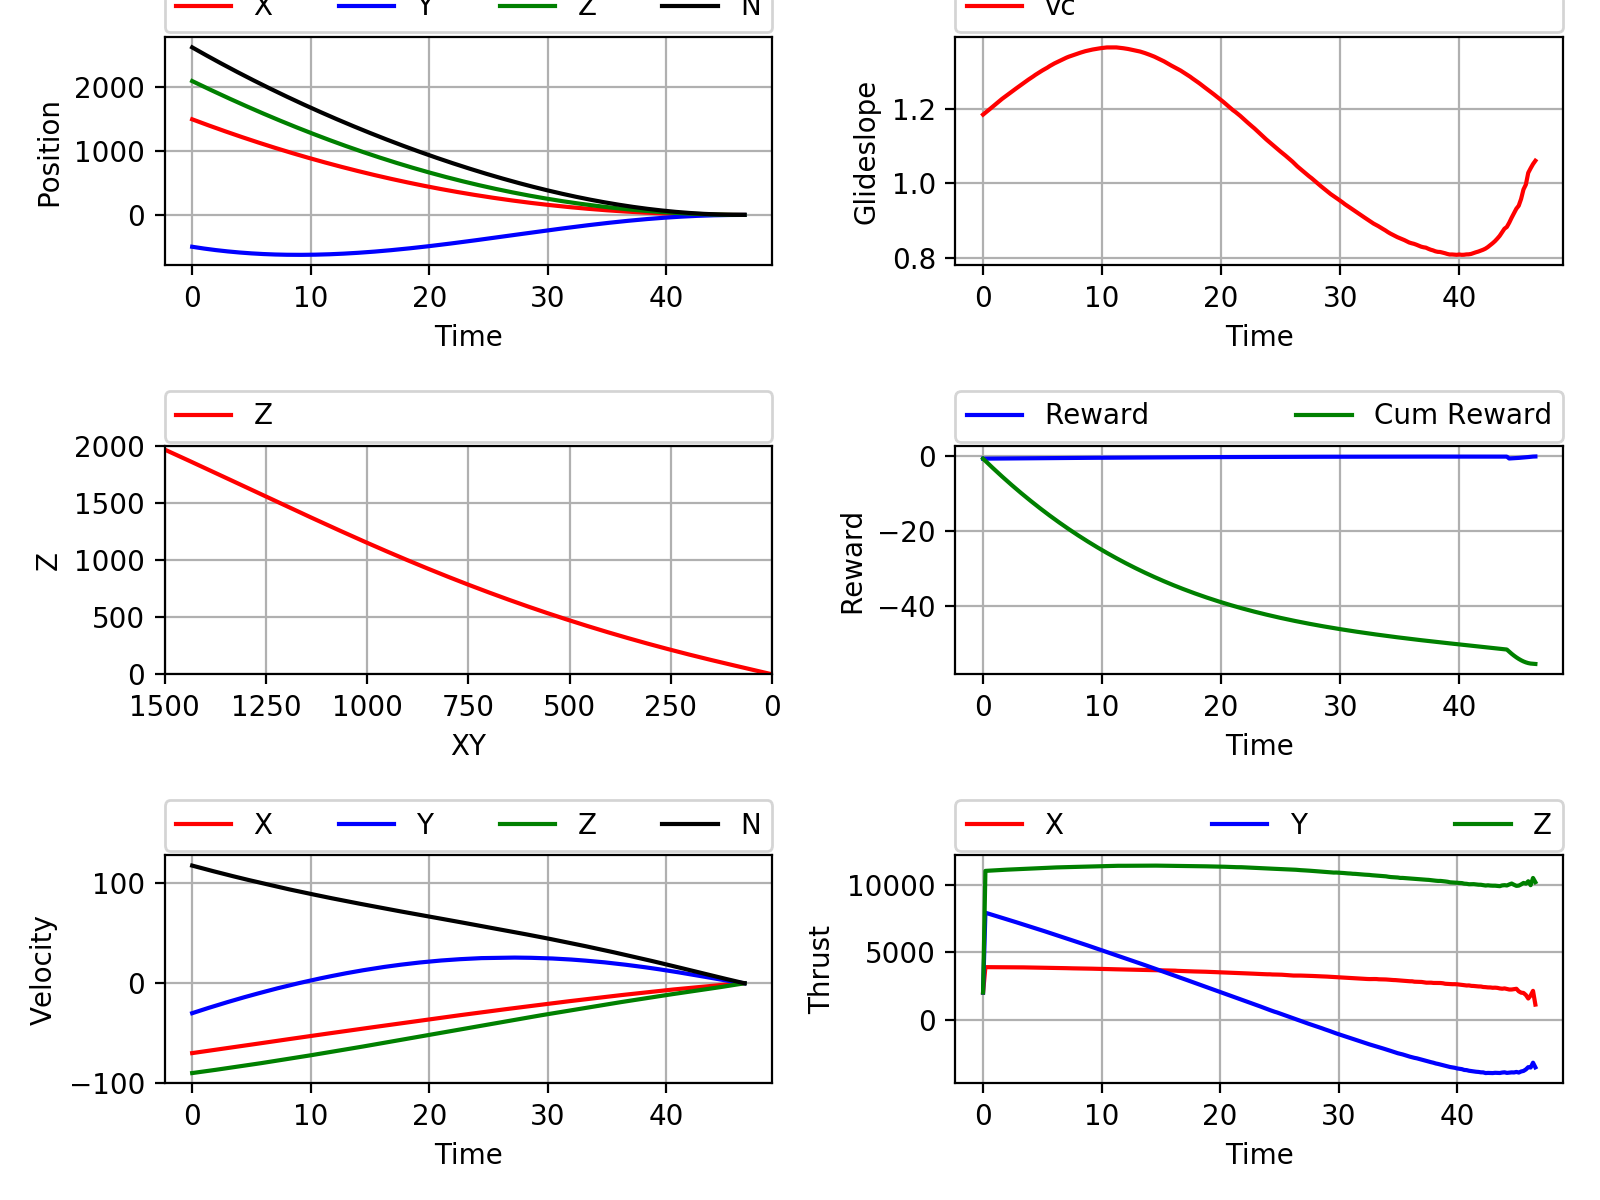

233 0.006176921753766272 0.08812700162431006


In [6]:
env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.05,0.05),noise_u=50,noise_sd=200,
                          downrange = (1500,1500 , -70, -70), 
                           crossrange = (-500,-500 , -30,-30),  
                           altitude = (2100,2100,-90,-90))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()